In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\baris\\Desktop\\Modern Data Analytics")

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [4]:
data = pd.read_csv("out/merged.csv", sep = ",", index_col=0)

In [5]:
data.head(10)

,YEAR,ARRON,WEEK,population_t,YEAR_WEEK,Nom_arrondissement,heatwave_week_boolean,COD_y,N_MASK
0,2000,11000,1,932103.0,2000-001,Antwerpen,0,natural,31.0
1,2000,12000,1,305670.0,2000-001,Mechelen,0,natural,10.0
2,2000,13000,1,406199.0,2000-001,Turnhout,0,natural,14.0
3,2000,21000,1,959318.0,2000-001,Bruxelles-Capitale,0,natural,43.0
4,2000,23000,1,558220.0,2000-001,Hal-Vilvorde,0,natural,14.0
5,2000,24000,1,456484.0,2000-001,Leuven,0,natural,20.0
6,2000,25000,1,349884.0,2000-001,Nivelles,0,natural,15.0
7,2000,31000,1,270866.0,2000-001,Brugge,0,natural,14.0
8,2000,32000,1,47992.0,2000-001,Diksmuide,0,natural,NaN
9,2000,33000,1,104278.0,2000-001,Ypres,0,natural,6.0


In [6]:
data.describe()

,YEAR,ARRON,WEEK,population_t,heatwave_week_boolean,N_MASK
count,44713.000000,44713.000000,44713.000000,4.461000e+04,44713.000000,44446.000000
mean,2009.493369,51187.685908,26.653546,2.524206e+05,0.036499,44.125343
std,5.764971,22800.066144,15.010964,2.333094e+05,0.187531,40.172202
min,2000.000000,11000.000000,1.000000,4.057400e+04,0.000000,4.000000
25%,2004.000000,34000.000000,14.000000,8.179025e+04,0.000000,16.000000
50%,2009.000000,51000.000000,27.000000,1.837520e+05,0.000000,32.000000
75%,2014.000000,71000.000000,40.000000,3.164360e+05,0.000000,57.000000
max,2019.000000,93000.000000,53.000000,1.217888e+06,1.000000,317.000000


In [7]:
data.heatwave_week_boolean.sum() /data.heatwave_week_boolean.count()

0.03649945206092188

In [8]:
data[data['heatwave_week_boolean']==0]

,YEAR,ARRON,WEEK,population_t,YEAR_WEEK,Nom_arrondissement,heatwave_week_boolean,COD_y,N_MASK
0,2000,11000,1,932103.0,2000-001,Antwerpen,0,natural,31.0
1,2000,12000,1,305670.0,2000-001,Mechelen,0,natural,10.0
2,2000,13000,1,406199.0,2000-001,Turnhout,0,natural,14.0
3,2000,21000,1,959318.0,2000-001,Bruxelles-Capitale,0,natural,43.0
4,2000,23000,1,558220.0,2000-001,Hal-Vilvorde,0,natural,14.0
...,...,...,...,...,...,...,...,...,...
44708,2019,58000,48,NaN,2019-048,La Louvière,0,natural,26.0
44709,2019,58000,49,NaN,2019-049,La Louvière,0,natural,26.0
44710,2019,58000,50,NaN,2019-050,La Louvière,0,natural,24.0
44711,2019,58000,51,NaN,2019-051,La Louvière,0,natural,37.0


In [9]:
#Extracting Season Feature
data['season']=np.ceil(data.WEEK/13).astype(int)
data.head()
#Extract %Mortality
data['percentage_death']=data.N_MASK/data.population_t
data.head()


,YEAR,ARRON,WEEK,population_t,YEAR_WEEK,Nom_arrondissement,heatwave_week_boolean,COD_y,N_MASK,season,percentage_death
0,2000,11000,1,932103.0,2000-001,Antwerpen,0,natural,31.0,1,0.000033
1,2000,12000,1,305670.0,2000-001,Mechelen,0,natural,10.0,1,0.000033
2,2000,13000,1,406199.0,2000-001,Turnhout,0,natural,14.0,1,0.000034
3,2000,21000,1,959318.0,2000-001,Bruxelles-Capitale,0,natural,43.0,1,0.000045
4,2000,23000,1,558220.0,2000-001,Hal-Vilvorde,0,natural,14.0,1,0.000025


In [10]:
np.unique(data['ARRON']).shape

(44,)

C:\Users\baris\Anaconda3\envs\mda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


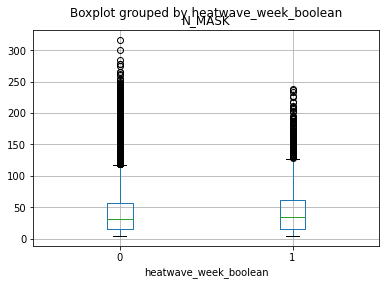

In [11]:
data.prop=data
plot=data.boxplot(column='N_MASK',by='heatwave_week_boolean')

In [12]:
data.groupby('heatwave_week_boolean')['N_MASK'].describe()

,count,mean,std,min,25%,50%,75%,max
heatwave_week_boolean,,,,,,,,
0,42820.0,44.051284,40.136975,4.0,16.0,32.0,57.0,317.0
1,1626.0,46.075646,41.053569,4.0,16.0,34.0,61.0,238.0


In [13]:
data.ARRON.isnull().sum()

0

In [14]:
# k-means discritizing arrondismants using coordinates to extract regions
arrondissements_url = 'https://raw.githubusercontent.com/mariobecerra/mda_project/main/data/arrondissements_coords.csv'
arron = pd.read_csv(arrondissements_url)
arron.head()


,NIS_Code,Nom_arrondissement,lat,lon
0,11000,Antwerpen,51.280681,4.505809
1,63000,Verviers,50.464213,6.022070
2,13000,Turnhout,51.250094,4.950422
3,62000,Liège,50.613433,5.607778
4,64000,Waremme,50.662789,5.206501


<AxesSubplot:xlabel='lat', ylabel='lon'>

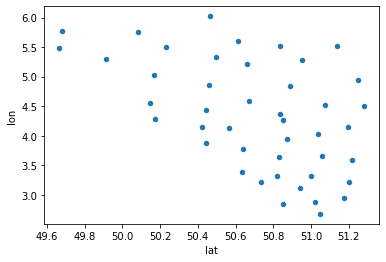

In [15]:
arron.plot(x='lat',y='lon',kind='scatter',)

<AxesSubplot:xlabel='lon', ylabel='lat'>

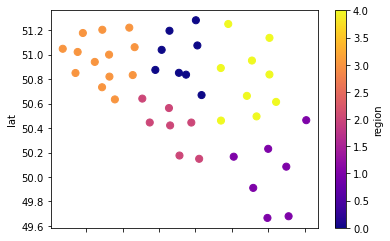

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
d = KMeans(n_clusters=5)
arron['region']=d.fit(arron[['lat','lon']]).labels_
arron.head()

arron.plot.scatter(y='lat',x='lon',c='region',cmap="plasma", s=50)

In [17]:
arron.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIS_Code            44 non-null     int64  
 1   Nom_arrondissement  44 non-null     object 
 2   lat                 44 non-null     float64
 3   lon                 44 non-null     float64
 4   region              44 non-null     int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44713 entries, 0 to 44712
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   44713 non-null  int64  
 1   ARRON                  44713 non-null  int64  
 2   WEEK                   44713 non-null  int64  
 3   population_t           44610 non-null  float64
 4   YEAR_WEEK              44713 non-null  object 
 5   Nom_a

In [18]:
#insert 5-means region to the dataset
df=pd.merge(data,arron,how='left',left_on='ARRON',right_on='NIS_Code').drop(columns=['NIS_Code','Nom_arrondissement_y'])
df.head()

,YEAR,ARRON,WEEK,population_t,YEAR_WEEK,Nom_arrondissement_x,heatwave_week_boolean,COD_y,N_MASK,season,percentage_death,lat,lon,region
0,2000,11000,1,932103.0,2000-001,Antwerpen,0,natural,31.0,1,0.000033,51.280681,4.505809,1
1,2000,12000,1,305670.0,2000-001,Mechelen,0,natural,10.0,1,0.000033,51.074719,4.526206,1
2,2000,13000,1,406199.0,2000-001,Turnhout,0,natural,14.0,1,0.000034,51.250094,4.950422,4
3,2000,21000,1,959318.0,2000-001,Bruxelles-Capitale,0,natural,43.0,1,0.000045,50.836055,4.370650,1
4,2000,23000,1,558220.0,2000-001,Hal-Vilvorde,0,natural,14.0,1,0.000025,50.851113,4.272715,1


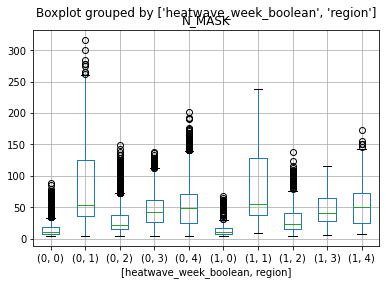

In [19]:
plot=df.boxplot(column='N_MASK',by=['heatwave_week_boolean','region'])

<AxesSubplot:xlabel='lon', ylabel='lat'>

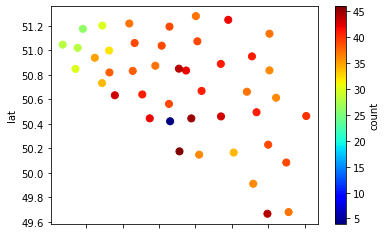

In [32]:
wavebyreg=df.groupby(['lat','lon','ARRON'])['heatwave_week_boolean'].sum().reset_index(name='count')
wavebyreg

wavebyreg.plot.scatter(y='lat',x='lon',c='count',cmap="jet", s=50)

(2.3314187760605107, 6.338812412144412, 49.43220653950047, 51.572300716755166)

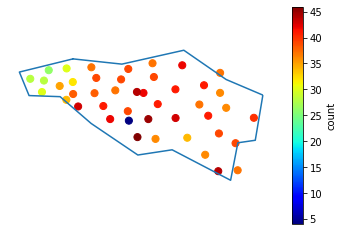

In [60]:
import geopandas
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
nybb=geopandas.read_file(geopandas.datasets.get_path('nybb'))

a=wavebyreg.plot.scatter(y='lat',x='lon',c='count',cmap="jet", s=50)
plot=world[world.name=='Belgium'].boundary.plot(ax=a)
plot.axis('off')

In [63]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [77]:
##making yearly heatwaves plot
number_heat=data.groupby(['YEAR','WEEK'])['heatwave_week_boolean'].sum()
a=number_heat[number_heat>0].to_frame()
heat_years=a.groupby('YEAR')['heatwave_week_boolean'].count()
heat_years

YEAR
2000    1
2001    1
2002    5
2003    9
2004    5
2005    9
2006    8
2007    6
2008    3
2009    1
2010    3
2011    4
2012    3
2014    4
2015    5
2016    2
2017    5
2018    7
2019    6
Name: heatwave_week_boolean, dtype: int64

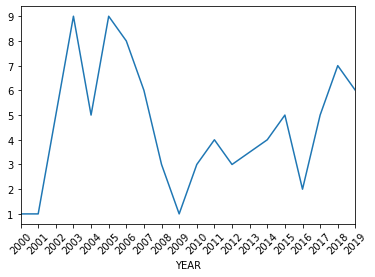

In [83]:
heat_years.plot.line(x='YEAR',y='heat_years',xticks=list(range(2000, 2020)),rot=45)

In [1]:
!pip freeze > requirements.txt